In [2]:
import pandas as pd

luca = pd.read_csv('/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/EV/python/ekspresyon2.csv', index_col=0) 

print(luca)

                 GACGCGTAGCTAAGAT.1.18.8  X861140_17.3  \
ENSG00000121410                        0             0   
ENSG00000268895                        0             0   
ENSG00000175899                        0             0   
ENSG00000245105                        0             0   
ENSG00000166535                        0             0   
...                                  ...           ...   
ENSG00000070476                        0             0   
ENSG00000203995                        0             0   
ENSG00000162378                        0             0   
ENSG00000159840                        0             0   
ENSG00000074755                        0             0   

                 ACGTCAACATCCCATC_LUNG_T08.5  X402999_11.3  \
ENSG00000121410                            0             0   
ENSG00000268895                            0             0   
ENSG00000175899                            0             0   
ENSG00000245105                            0           

In [3]:
transposed_luca = luca.transpose()

print(transposed_luca)

                             ENSG00000121410  ENSG00000268895  \
GACGCGTAGCTAAGAT.1.18.8                    0                0   
X861140_17.3                               0                0   
ACGTCAACATCCCATC_LUNG_T08.5                0                0   
X402999_11.3                               0                0   
ATGGTTGTCAATCCGA.1_2.1                     2                0   
...                                      ...              ...   
TTC29.20171120.3                           0                0   
X2_TGAGAACTGTCT.20                         0                0   
CCATTCGAGTTAACGA.1.20.8                    0                0   
X446185_11.3                               1                0   
AACTTTCTCGTAGGTT.1.1.8                     0                0   

                             ENSG00000175899  ENSG00000245105  \
GACGCGTAGCTAAGAT.1.18.8                    0                0   
X861140_17.3                               0                0   
ACGTCAACATCCCATC_LUNG_T0

In [4]:
import requests

def get_ensemble_gene_id(gene_name):
    url = f"https://rest.ensembl.org/lookup/symbol/homo_sapiens/{gene_name}?content-type=application/json"
    response = requests.get(url)
    if response.ok:
        data = response.json()
        ensemble_gene_id = data['id']
        return ensemble_gene_id
    else:
        print(f"Error: Unable to retrieve Ensemble Gene ID for {gene_name}")
        return None

# Örnek gen isimleri
wanted_genes = ["ARF6", "CD37", "CD63", "CD81", "CD9", "CHMP1A", "CHMP1B", "CHMP2A", "CHMP2B", "CHMP3", "CHMP4A", "CHMP4B", "CHMP5", "CHMP6", "HGS", "HSP90AA1", "HSPA4", "HSPA8", "HSPD1", "MVB12A", "MVB12B", "PDCD6", "PDCD6IP", "SDCBP", "SNF8", "STAM", "STAM2", "TSG101", "VPS25", "VPS36", "VPS37A", "VPS37B", "VPS37C", "VPS37D", "VPS4A", "VTA1"]

# Ensemble Gene ID'lerini depolamak için bir liste oluştur
ensemble_gene_ids = []

for gene_name in wanted_genes:
    ensemble_gene_id = get_ensemble_gene_id(gene_name)
    if ensemble_gene_id:
        ensemble_gene_ids.append(ensemble_gene_id)

# Ensemble Gene ID'lerini virgülle ayrılmış ve çift tırnak içinde yazdır
ensemble_gene_ids_str = ', '.join(['"' + gene_id + '"' for gene_id in ensemble_gene_ids])
print(ensemble_gene_ids_str)


KeyboardInterrupt: 

In [5]:
wanted_genes = ["ENSG00000165527", "ENSG00000104894", "ENSG00000135404", "ENSG00000110651", "ENSG00000010278", "ENSG00000131165", "ENSG00000255112", "ENSG00000130724", "ENSG00000083937", "ENSG00000115561", "ENSG00000254505", "ENSG00000101421", "ENSG00000086065", "ENSG00000176108", "ENSG00000185359", "ENSG00000080824", "ENSG00000170606", "ENSG00000109971", "ENSG00000144381", "ENSG00000141971", "ENSG00000196814", "ENSG00000249915", "ENSG00000170248", "ENSG00000137575", "ENSG00000159210", "ENSG00000136738", "ENSG00000115145", "ENSG00000074319", "ENSG00000131475", "ENSG00000136100", "ENSG00000155975", "ENSG00000139722", "ENSG00000167987", "ENSG00000176428", "ENSG00000132612", "ENSG00000009844"]


# İstenilen genlerin olduğu sütunları filtrele
filtered_luca = transposed_luca[wanted_genes]

# Sonucu göster
print(filtered_luca)

                             ENSG00000165527  ENSG00000104894  \
GACGCGTAGCTAAGAT.1.18.8                    1                1   
X861140_17.3                               0                1   
ACGTCAACATCCCATC_LUNG_T08.5                1                4   
X402999_11.3                               4                0   
ATGGTTGTCAATCCGA.1_2.1                     0                1   
...                                      ...              ...   
TTC29.20171120.3                          58               87   
X2_TGAGAACTGTCT.20                         0                0   
CCATTCGAGTTAACGA.1.20.8                    0                1   
X446185_11.3                               0                1   
AACTTTCTCGTAGGTT.1.1.8                     0                0   

                             ENSG00000135404  ENSG00000110651  \
GACGCGTAGCTAAGAT.1.18.8                    0                0   
X861140_17.3                               0                0   
ACGTCAACATCCCATC_LUNG_T0

In [6]:

from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

#  store the row names
row_names = filtered_luca.index.tolist()

# Use the DataFrame containing only gene expressions
gen_expression_only = filtered_luca.values

# Create the PCA model
pca = PCA(n_components=36)  # Let's take a total of 36 components

# Apply the PCA model to the dataset and make it compatible
pca.fit(gen_expression_only)

# Create a DataFrame containing the PCA results
pca_result = pd.DataFrame(pca.transform(gen_expression_only), columns=[f'PC{i+1}' for i in range(36)])

# Add back the row names
pca_result.index = row_names

print(pca_result)


                                    PC1        PC2        PC3        PC4  \
GACGCGTAGCTAAGAT.1.18.8     -107.086719 -10.093797 -29.464594  -1.055260   
X861140_17.3                 -90.282706  -0.947237 -30.537925  -1.642646   
ACGTCAACATCCCATC_LUNG_T08.5 -115.019684 -12.109907 -28.771428  -0.742561   
X402999_11.3                -112.885261 -11.941198 -28.914687  -1.164101   
ATGGTTGTCAATCCGA.1_2.1      -108.460562 -13.512380 -21.864114  -1.046143   
...                                 ...        ...        ...        ...   
TTC29.20171120.3             163.812895 -12.898866 -37.327291  33.231097   
X2_TGAGAACTGTCT.20           -87.631089 -16.175077 -25.061957   8.965171   
CCATTCGAGTTAACGA.1.20.8     -114.400356 -13.332043 -29.061806  -0.858119   
X446185_11.3                -114.433940 -13.548083 -29.184371  -1.094566   
AACTTTCTCGTAGGTT.1.1.8      -114.023677 -12.518304 -28.078760  -1.167370   

                                   PC5         PC6        PC7       PC8  \
GACGCGTAGCTA

In [7]:
print(pca.singular_values_)

[4.71963547e+05 1.55351888e+05 1.20726250e+05 5.16534067e+04
 4.56615657e+04 3.74672588e+04 2.98393958e+04 2.72820188e+04
 2.34580955e+04 1.88264676e+04 1.73677754e+04 1.24204643e+04
 1.21358991e+04 1.15243035e+04 1.10889536e+04 9.90194656e+03
 9.29887499e+03 8.66386726e+03 8.33567127e+03 7.88669604e+03
 7.40613184e+03 7.28727728e+03 7.03528335e+03 6.79543904e+03
 6.35458775e+03 6.21510148e+03 5.85222523e+03 5.25910385e+03
 5.19982201e+03 5.01180353e+03 4.17417714e+03 3.76264144e+03
 3.08569112e+03 2.70853255e+03 1.05051625e+03 6.18640852e+01]


In [8]:
print(pca.explained_variance_ratio_)

[8.19380074e-01 8.87772236e-02 5.36132220e-02 9.81446039e-03
 7.66955355e-03 5.16383463e-03 3.27528078e-03 2.73792467e-03
 2.02420263e-03 1.30378556e-03 1.10957554e-03 5.67471618e-04
 5.41766816e-04 4.88537445e-04 4.52323986e-04 3.60669687e-04
 3.18074831e-04 2.76116313e-04 2.55593406e-04 2.28801408e-04
 2.01767570e-04 1.95343550e-04 1.82067183e-04 1.69864853e-04
 1.48539942e-04 1.42090465e-04 1.25982595e-04 1.01740058e-04
 9.94593099e-05 9.23967215e-05 6.40929463e-05 5.20779829e-05
 3.50246163e-05 2.69858812e-05 4.05951390e-06 1.40781529e-08]


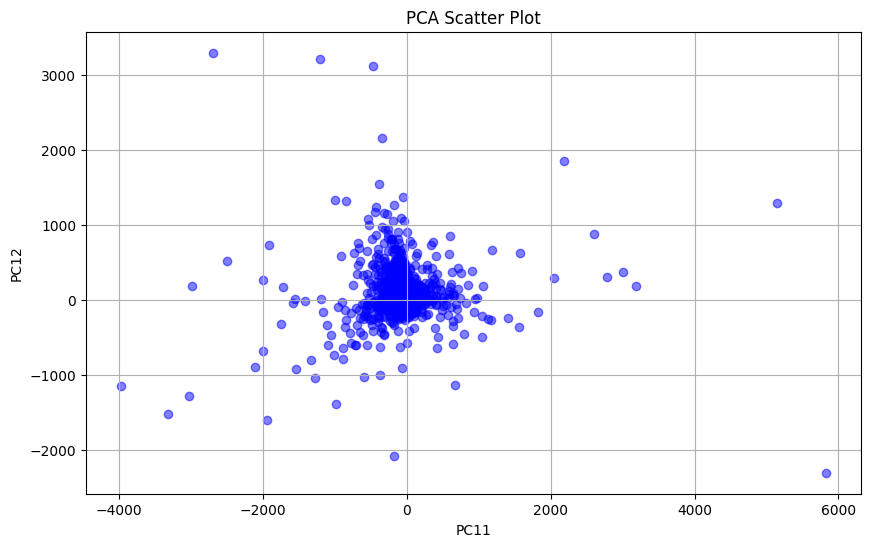

In [9]:
import matplotlib.pyplot as plt

# PCA bileşenlerini seçme
component1 = 'PC11'
component2 = 'PC12'

# PCA sonuçlarından PC1 ve PC2'yi alın
x = pca_result[component1]
y = pca_result[component2]

# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel(component1)
plt.ylabel(component2)
plt.grid(True)
plt.show()


In [10]:
#eliminate PC1 and PC2 for prepearing randomforest
pca_result_modified = pca_result.drop(columns=['PC1', 'PC2'])

pca_result_modified = pca_result_modified.iloc[:, :10]

print(pca_result_modified)

                                   PC3        PC4        PC5         PC6  \
GACGCGTAGCTAAGAT.1.18.8     -29.464594  -1.055260  -1.326290   -0.595214   
X861140_17.3                -30.537925  -1.642646  -6.952652    0.068918   
ACGTCAACATCCCATC_LUNG_T08.5 -28.771428  -0.742561  -0.097712   -0.584323   
X402999_11.3                -28.914687  -1.164101  -0.843973   -1.990801   
ATGGTTGTCAATCCGA.1_2.1      -21.864114  -1.046143   3.696190    3.264122   
...                                ...        ...        ...         ...   
TTC29.20171120.3            -37.327291  33.231097 -89.184966  250.029537   
X2_TGAGAACTGTCT.20          -25.061957   8.965171  -4.625725   -1.415033   
CCATTCGAGTTAACGA.1.20.8     -29.061806  -0.858119  -0.199999   -0.445875   
X446185_11.3                -29.184371  -1.094566  -0.854237   -1.210142   
AACTTTCTCGTAGGTT.1.1.8      -28.078760  -1.167370  -0.237093   -0.814948   

                                   PC7       PC8        PC9      PC10  \
GACGCGTAGCTAAG

In [11]:
import pandas as pd
import joblib

# Eğitilmiş modeli yükleme
loaded_model = joblib.load('/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/EV/python/random_forest_model.pkl')

# Yeni veri setinden özellikleri seçme
X_new = pca_result_modified.iloc[:, :]

# Test seti üzerinde %votes değerlerini tahmin etme
votes = loaded_model.predict_proba(X_new)

# Her bir hücre ismi için %votes değerlerini içeren bir DataFrame oluşturma
votes_df = pd.DataFrame(data=votes, columns=loaded_model.classes_, index=X_new.index)

# DataFrame'i görüntüleme veya işlem yapma
print(votes_df)
votes_df.to_csv('votes_df_luca2.csv', index=True)


/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/.venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/.venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


                             negative  positive
GACGCGTAGCTAAGAT.1.18.8          0.44      0.56
X861140_17.3                     0.58      0.42
ACGTCAACATCCCATC_LUNG_T08.5      0.43      0.57
X402999_11.3                     0.43      0.57
ATGGTTGTCAATCCGA.1_2.1           0.61      0.39
...                               ...       ...
TTC29.20171120.3                 0.47      0.53
X2_TGAGAACTGTCT.20               0.54      0.46
CCATTCGAGTTAACGA.1.20.8          0.45      0.55
X446185_11.3                     0.42      0.58
AACTTTCTCGTAGGTT.1.1.8           0.50      0.50

[50000 rows x 2 columns]


In [ ]:
cell_types = pd.read_csv('/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/EV/python/primary_luca_cell_type.csv', index_col=0) 

print(cell_types)

In [ ]:
# Yeni bir DataFrame oluşturma ve sıfırlarla doldurma
new_column = pd.DataFrame(index=votes_df.index, columns=["cell_types"])

# Cell_types DataFrame'inin indekslerini kontrol ederek eşleşen satırlara karşılık gelen değerleri atama
for index in cell_types.index:
    if index in votes_df.index:
        new_column.loc[index] = cell_types.loc[index].values[0]

# Yeni sütunu votes_df'e eklemek
votes_df["cell_types"] = new_column

# Oluşturulan DataFrame'i gösterme
print(votes_df)


In [12]:
max_positive_value = votes_df["positive"][votes_df["positive"] > 0].max()
print("En büyük pozitif değer:", max_positive_value)


En büyük pozitif değer: 0.93
